In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Indhu\OneDrive\Desktop\hireclustring\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df['description'] = df['description'].fillna('')
df['listed_in'] = df['listed_in'].fillna('')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df['combined_text'] = df['description'] + " " + df['listed_in']

In [6]:
df_sampled = df.sample(n=1000, random_state=42).reset_index(drop=True)

In [7]:
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf.fit_transform(df_sampled['combined_text']).toarray()

print(f"Feature matrix shape: {tfidf_matrix.shape}")

Feature matrix shape: (1000, 500)


In [8]:
Z = linkage(tfidf_matrix, method='ward')

In [9]:
Z

array([[4.12000000e+02, 8.02000000e+02, 3.19704752e-01, 2.00000000e+00],
       [3.90000000e+01, 1.31000000e+02, 4.46979240e-01, 2.00000000e+00],
       [4.32000000e+02, 9.46000000e+02, 4.98609904e-01, 2.00000000e+00],
       ...,
       [1.98600000e+03, 1.99500000e+03, 4.78689464e+00, 3.59000000e+02],
       [1.94600000e+03, 1.99400000e+03, 5.42916126e+00, 6.41000000e+02],
       [1.99600000e+03, 1.99700000e+03, 7.37179354e+00, 1.00000000e+03]],
      shape=(999, 4))

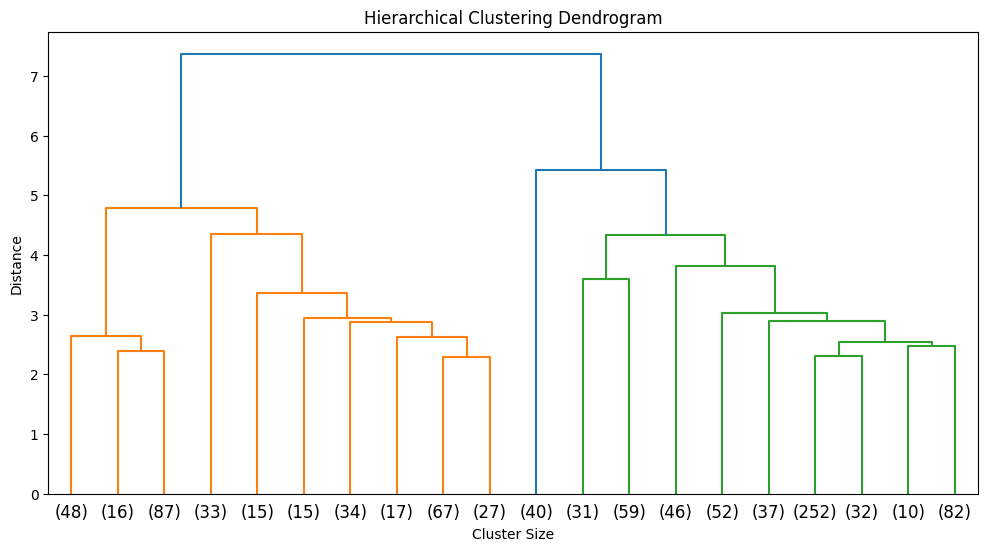

In [10]:
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, truncate_mode='lastp', p=20)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [11]:
n_clusters = 5
model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
df_sampled['cluster'] = model.fit_predict(tfidf_matrix)

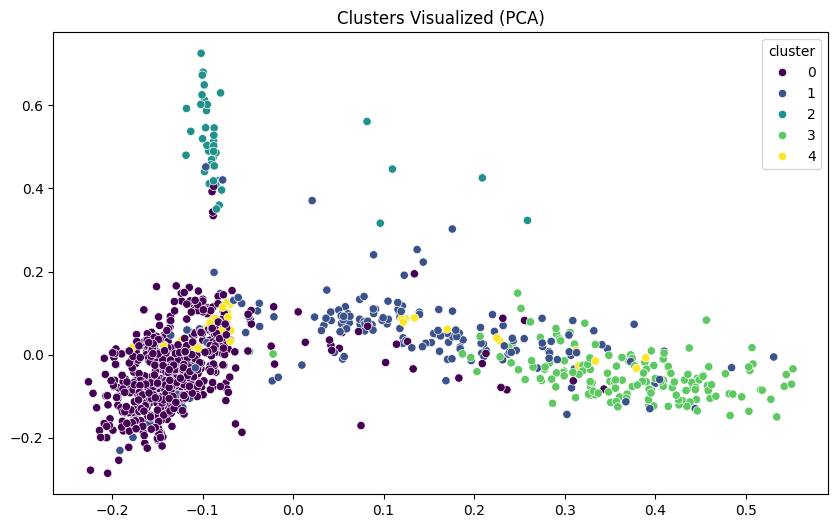

In [12]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(tfidf_matrix)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_sampled['cluster'], palette='viridis')
plt.title('Clusters Visualized (PCA)')
plt.show()

In [13]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(tfidf_matrix, df_sampled['cluster'])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(classifier, 'cluster_model.pkl')

['cluster_model.pkl']

In [15]:
df_sampled.to_csv('clustered_data.csv', index=False)
print("Files saved: tfidf_vectorizer.pkl, cluster_model.pkl, clustered_data.csv")

Files saved: tfidf_vectorizer.pkl, cluster_model.pkl, clustered_data.csv
